UFRJ/COPPE/PEE<br>
COC800 Data Mining - Trabalho Final - Prof Alexandre G. Evsukoff<br>
Alunos: Gustavo Martins da Silva Nunes e Michel Morais Ferreira<br>


# Census Income Dataset

## 1. Introdução
<div align="justify"><br>
Este notebook apresenta o desenvolvimento realizado para o trabalho final da disciplina COC800 Data Mining no período letivo de 2018/1. 
</div>

### 1.1 Apresentação do Problema
<div align="justify"><br>
A base de dados [Census Income Dataset](https://archive.ics.uci.edu/ml/datasets/Census+Income) é um subconjunto dos dados obtidos no censo demográfico realizado nos Estados Unidos no ano de 1994[1]. O dataset a ser estudado possui 15 variáveis das 40 utilizadas no conjunto de dados do censo realizado[2], sendo 14 destas variáveis informações sobre a população, tais como idade, raça, profissão, horas de trabalho por semana entre outras, e uma variável que representa se o cidadão recebe anualmente mais de \$50.000 dólares ao ano ou não. A tarefa a ser realizada no estudo desse conjunto de dados é a tarefa de classificação dos cidadãos em duas classes: cidadãos com ganhos anuais iguais ou superiores a $50.000 por ano, ou cidadãos com ganhos inferiores a este. 
  
A escolha por este dataset foi motivada devido à variedade de informações a serem tratadas, tais como dados faltantes e a necessidade do tratamento de variáveis mistas(variáveis contínuas e variáveis categóricas), além do extenso número de artigos que foram escritos utilizando esta base de dados como base de comparação de performance de algoritmos de diversos modelos de aprendizado de máquinas.
</div>

### 1.2 Objetivo
<div align="justify"><br>
O trabalho tem como objetivo utilizar os modelos estudados durante o curso para classificarmos com a maior acurácia possível os cidadãos nos dois grupos de renda citados anteriormente. Após o treinamento dos modelos, será feita a comparação entre a performance dos modelos.
</div>

### 1.3 Apresentação da Tecnologia
<div align="justify"><br>
Devido à facilidade e experiência prévia dos participantes do grupo, a linguagem <i>Python</i> será utilizada para a realização do projeto. Devido à sua versatilidade, grande quantidade de materiais disponíveis na internet e muitas bibliotecas voltadas para análise de dados e criação de modelos de <i>machine learning</i>, a linguagem <i>Python</i> é uma excelente candidata para o projeto. 

Para a realização das análises dos dados serão usadas as bibliotecas mais utilizadas para este fim, sendo elas: <b><i>Numpy, Scipy e Pandas</i></b>. Para a visualização dos dados, serão utilizadas as bibliotecas <b><i>Matplotlib e Seaborn</i></b>. Para a construção dos modelos de aprendizado de máquinas, as bibliotecas utilizadas serão <b><i>Scikit-Learn, TensorFlow e Keras</i></b>
</div>

### 1.4 Caracterização e Visualização de Dados
<div align="justify"><br>
Será realizada a análise exploratória dos dados para a averiguação dos dados e compreensão dos mesmos. A fase de exploração de dados será decisiva para a construção de um modelo consistente para a classificação correta esperada pro problema. Após a análise exploratória, será realizado o pré-processamento dos dados, onde serão tratados dados faltantes, análise de outliers e o tratamento apropriado de cada tipo de variável(contínua ou categórica) para serem utilizadas como entrada para o modelo de aprendizado de máquinas.
</div>

## 2. Análise Exploratória dos Dados

In [342]:
# Importando os módulos necessários para o processamento dos dados
import numpy   as np
import pandas  as pd

# Módulos necessários para visualização dos dados
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

# Transformação do target e outras features em binárias: utilização de -1 para ganhos menores que 50K/Year, +1 para ganhos maiores de 50K/year
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()

%matplotlib inline

# O arquivo de dados não possui headers; Incluir uma lista de nomes das features
features = ['age','workclass','fnlwgt','education','education-num','marital-status',
            'occupation','relationship','race','sex','capital-gain','capital-loss',
            'hours-per-week','native-country','earnings']

# Importando os dados do dataset
training_data = pd.read_csv('Data/train.txt',names=features,index_col=False)
test_data = pd.read_csv('Data/test.txt',names=features,index_col=False)

# Amostrando o dataset, para trabalhar com uma porção menor do mesmo

training_data = training_data.sample(frac=0.1, replace=False, random_state=0)

#### 2.1 Verificando os dados do conjunto de treinamento

In [343]:
# Verificando a base de treinamento 
print('Quantidade de exemplos presentes na base: {}\nQuantidade de features presentes na base: {}'.format(*training_data.shape))

Quantidade de exemplos presentes na base: 3256
Quantidade de features presentes na base: 15


In [344]:
# Exemplos da base
training_data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earnings
22278,27,Private,177119,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,44,United-States,<=50K
8950,27,Private,216481,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
7838,25,Private,256263,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
16505,46,Private,147640,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,1902,40,United-States,<=50K
19140,45,Private,172822,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States,>50K


In [345]:
# Verificando os tipos de dados presentes
print('Tipos de dados presentes nas bases de dados:\n\n{}'.format(training_data.dtypes))

Tipos de dados presentes nas bases de dados:

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
earnings          object
dtype: object


##### 2.1.1 Tratando registros faltantes

Porcentagem de registros com valores faltantes: 7.52


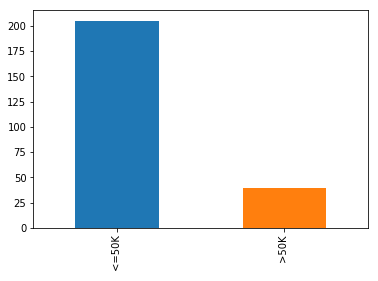

In [346]:
# Computando a quantidade de registros que contém, pelo menos, uma feature com valor faltante

indices_linhas_registros_com_valores_faltantes = set()
qtd_valores_faltantes_por_registro = dict()

for lin in training_data.index.values:
    for col in training_data.columns.values:
        if training_data.at[lin,col] == ' ?':
            indices_linhas_registros_com_valores_faltantes.add(lin)
#             continue # pula para o próximo registro
            if lin in qtd_valores_faltantes_por_registro:
                qtd_valores_faltantes_por_registro[lin] += 1
            else:
                qtd_valores_faltantes_por_registro[lin] = 1
            
porcentagem_registros_com_valores_faltantes = (len(indices_linhas_registros_com_valores_faltantes)/training_data.shape[0])*100
print('Porcentagem de registros com valores faltantes: %.2f' % porcentagem_registros_com_valores_faltantes)

# Mostrando quantos desses registros estão associados a cada classe (<=50k e >50k)

training_data.loc[indices_linhas_registros_com_valores_faltantes,'earnings'].value_counts().plot.bar()
plt.show()

Como tratar esses valores faltantes? Será que podemos jogar fora?

#### 2.2 Análise de features categóricas

In [347]:
# Verificando as variáveis categóricas 
training_data_categorical = training_data.select_dtypes(include=['object'])
training_data_categorical.head(5)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,earnings
22278,Private,Some-college,Divorced,Adm-clerical,Unmarried,White,Female,United-States,<=50K
8950,Private,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
7838,Private,Assoc-acdm,Married-civ-spouse,Sales,Husband,White,Male,United-States,<=50K
16505,Private,5th-6th,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,United-States,<=50K
19140,Private,11th,Divorced,Transport-moving,Not-in-family,White,Male,United-States,>50K


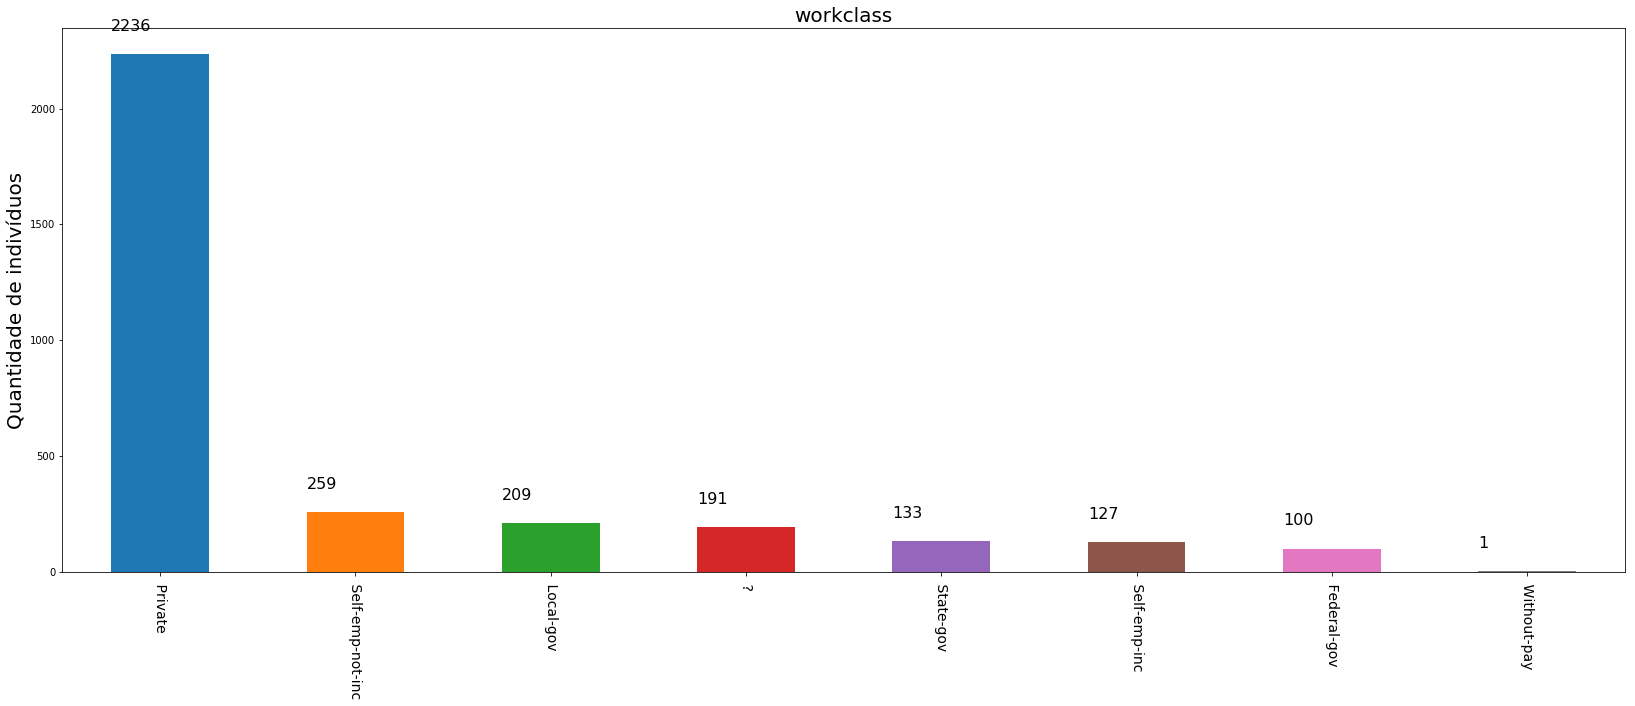

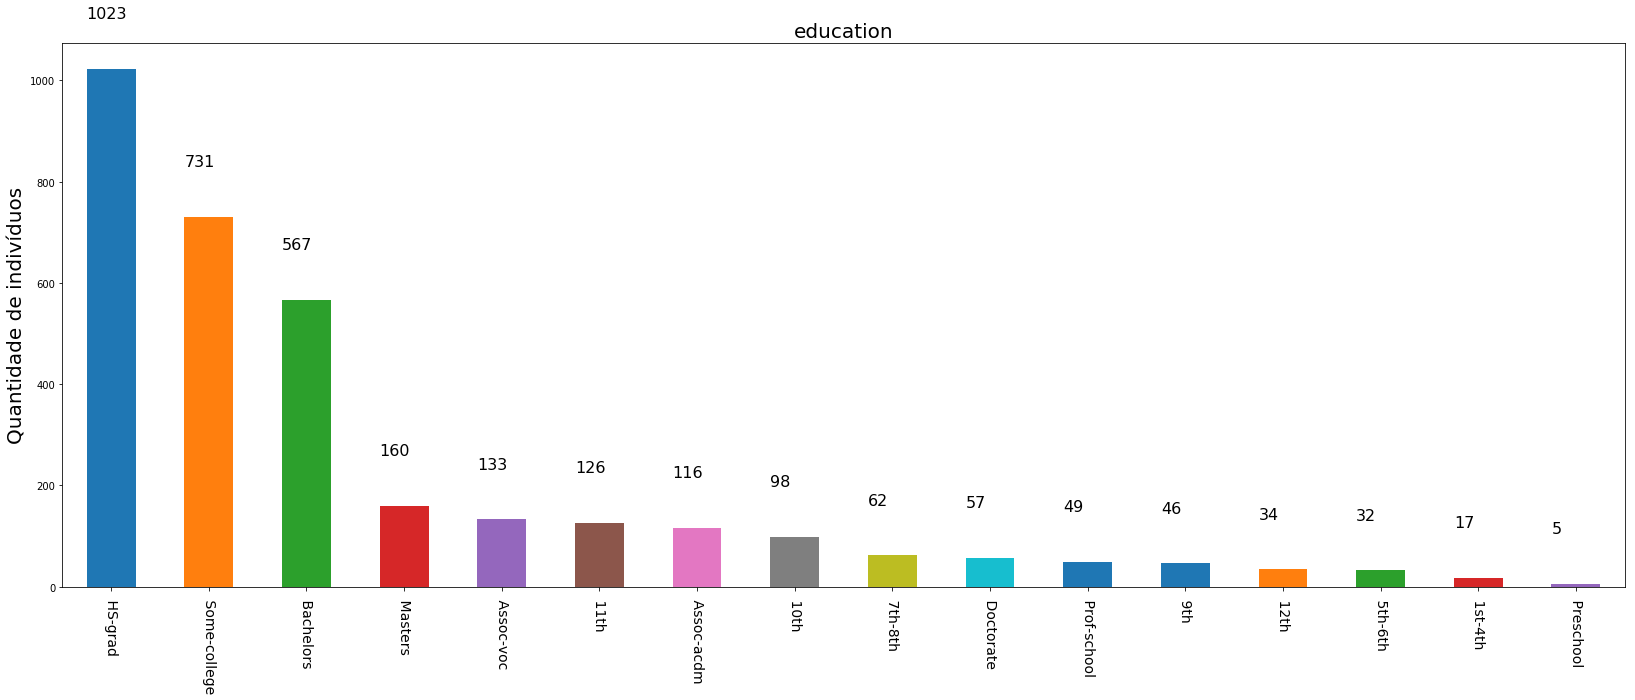

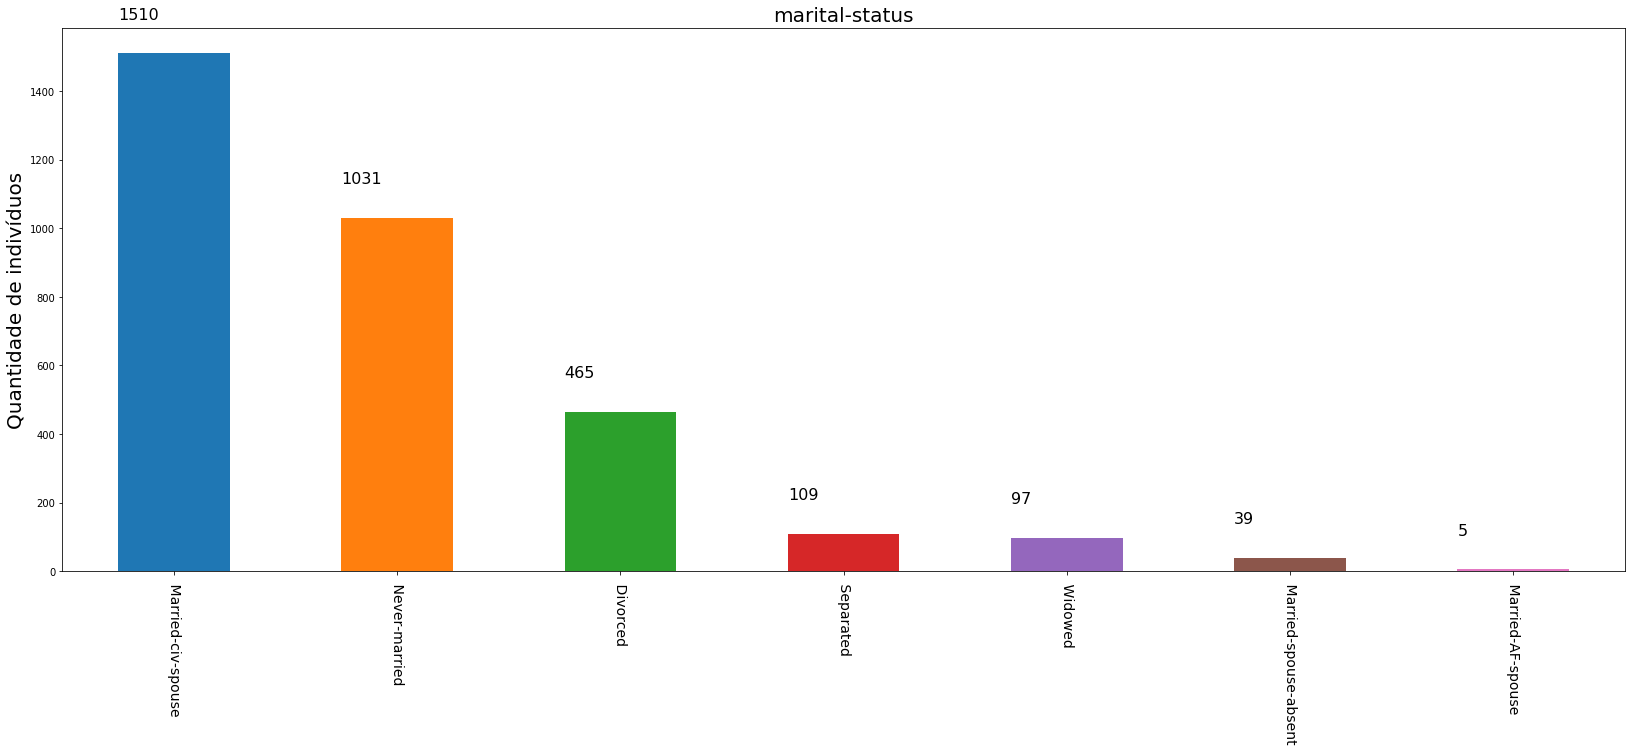

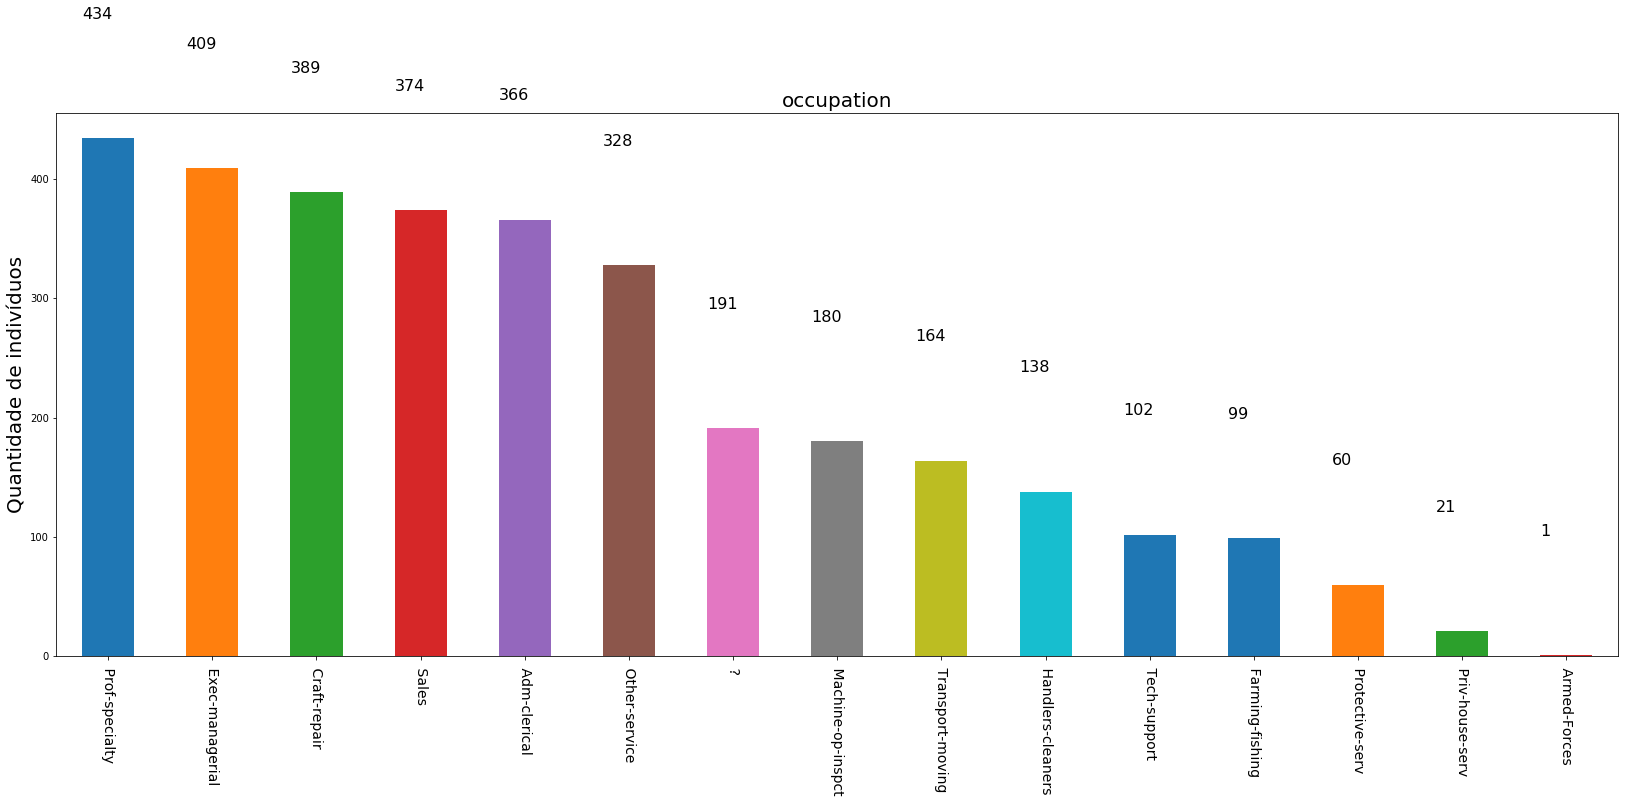

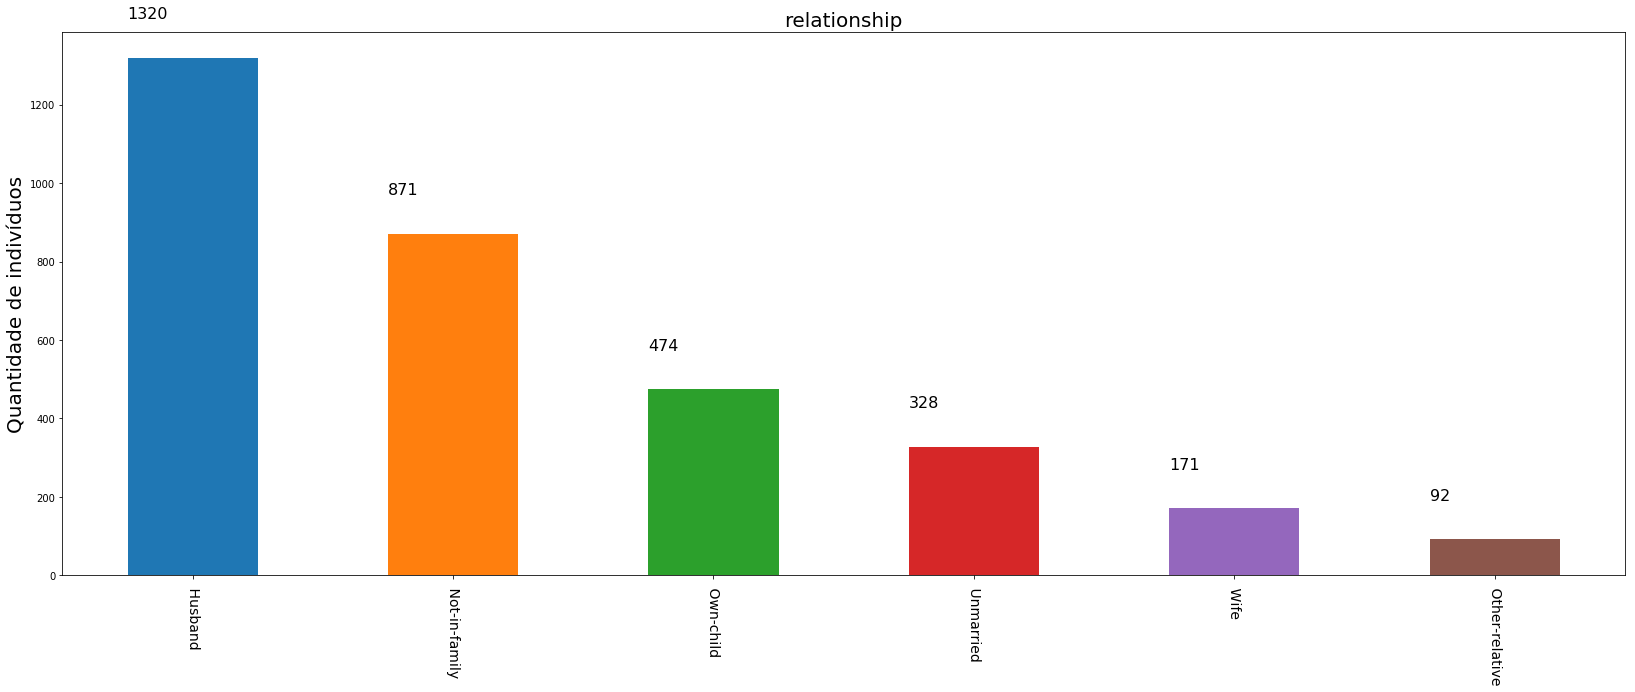

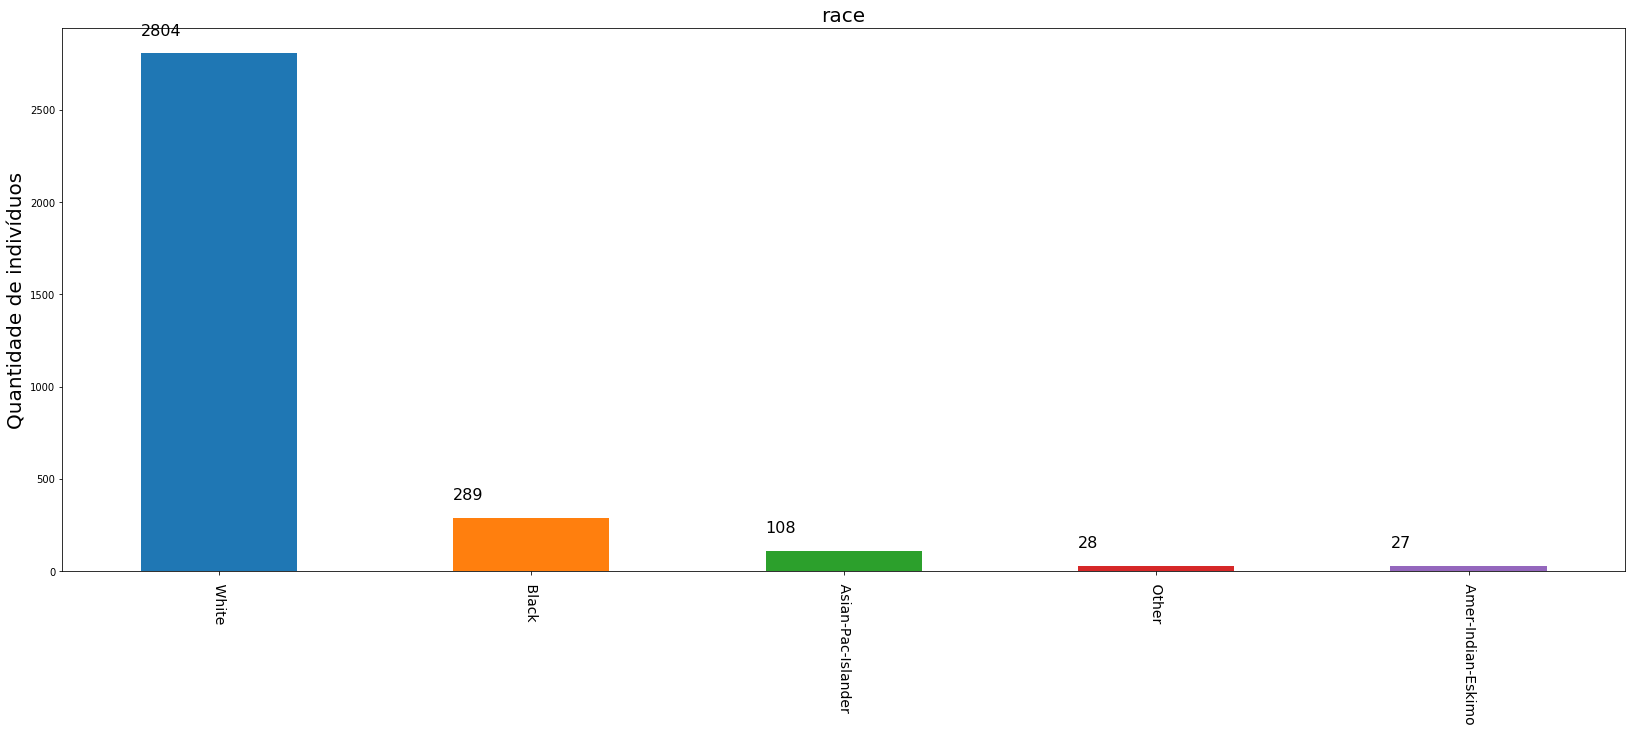

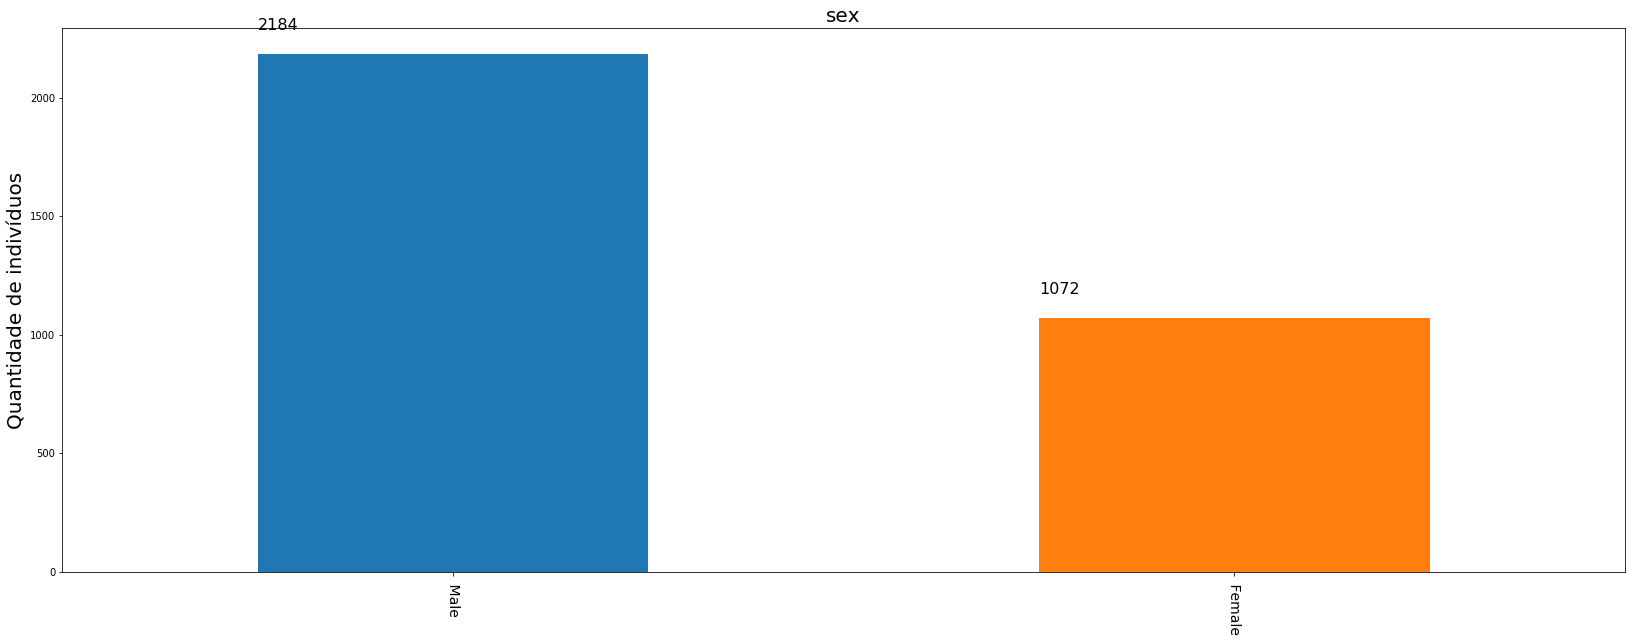

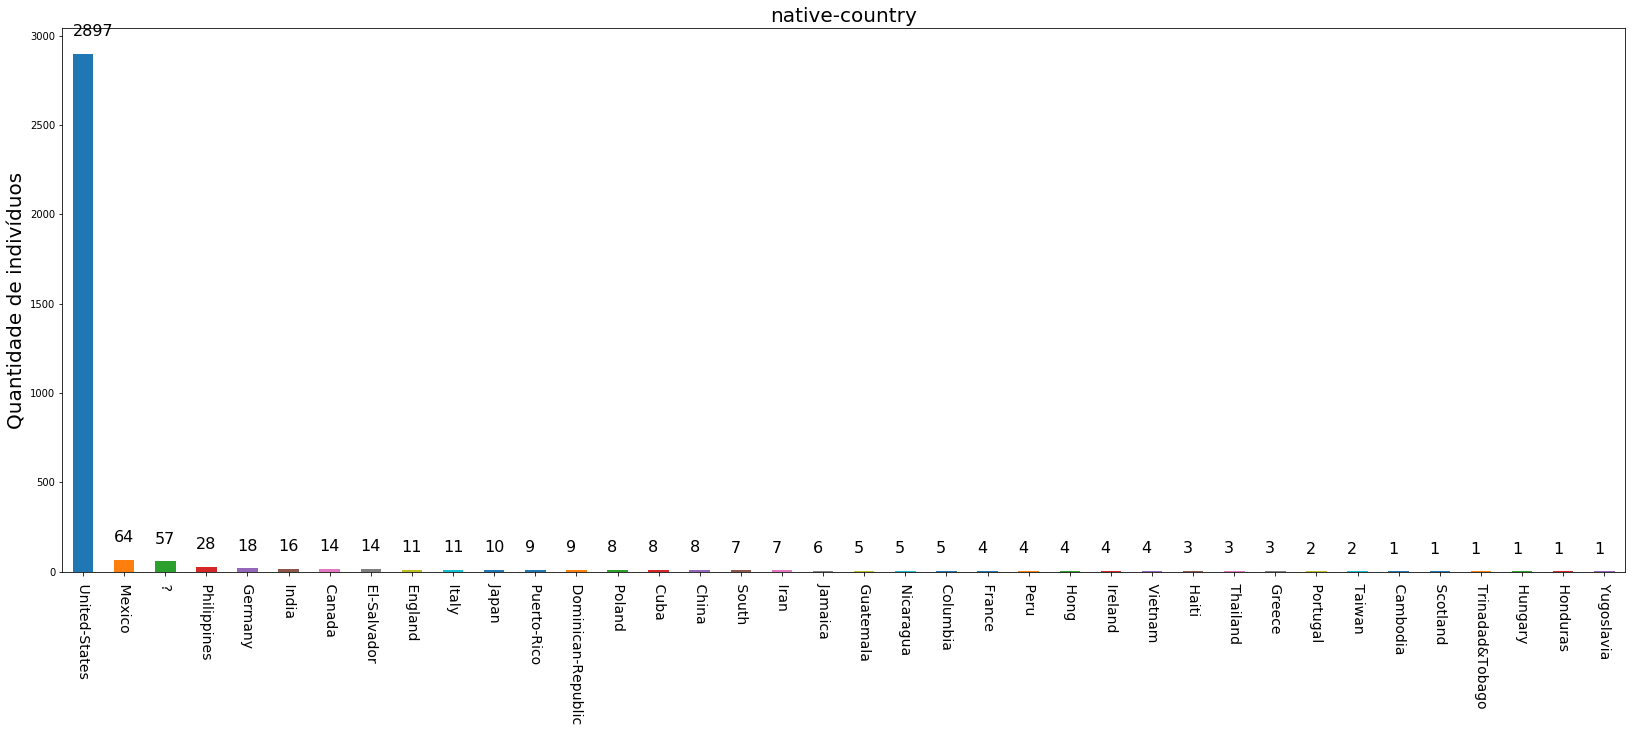

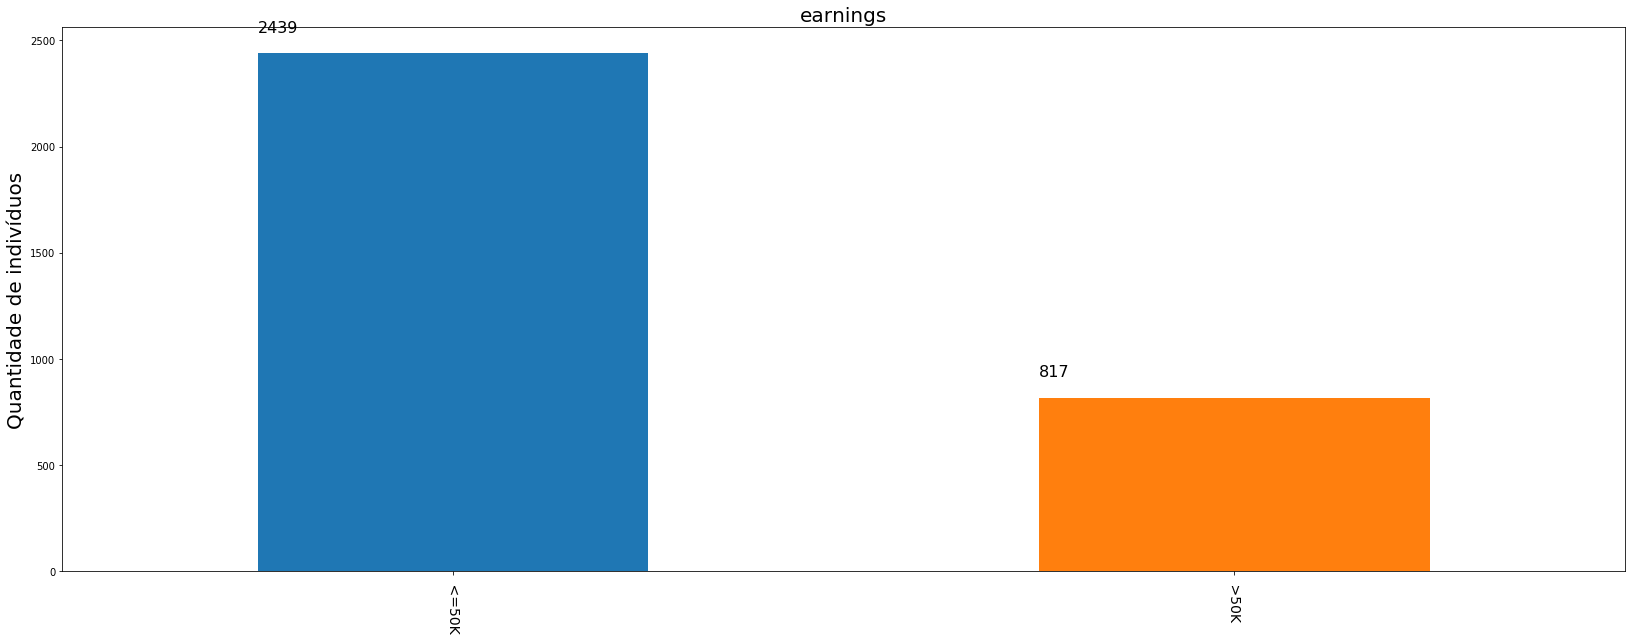

In [348]:
# Quais os possíveis valores para cada feature?
for feature in list(training_data_categorical.columns):
    # Configuração dos plots
    plt.figure(figsize=(28,10))
    plt.title(feature,fontsize=20)
    plt.ylabel('Quantidade de indivíduos',fontsize=20)
    
    # Configurando os textos no gráfico
    ax = training_data_categorical[feature].value_counts().plot.bar()
    ax.set_alpha(0.8)
        
    for patch in ax.patches:
        ax.text(patch.get_x(), patch.get_height() + 100, str(patch.get_height()),fontsize=16)
        plt.xticks(rotation=-90,fontsize=14)
        
plt.show()

Pelos gráficos anteriores, é possível perceber um grande desbalanceamento entre os possíveis valores de diversas features categóricas. Dessa forma, categorias pouco frequentes em uma dada feature podem ser combinadas, de modo a reduzir a quantidade de categorias disponíveis e simplificar a análise.

##### 2.2.1 Tratando a feature native-country

In [349]:
# Analisando a feature native-country

country_frequency = training_data_categorical['native-country'].value_counts()/training_data_categorical.shape[0] # Porcentagem de cada classe no dataset
print(country_frequency)

 United-States         0.889742
 Mexico                0.019656
 ?                     0.017506
 Philippines           0.008600
 Germany               0.005528
 India                 0.004914
 Canada                0.004300
 El-Salvador           0.004300
 England               0.003378
 Italy                 0.003378
 Japan                 0.003071
 Puerto-Rico           0.002764
 Dominican-Republic    0.002764
 Poland                0.002457
 Cuba                  0.002457
 China                 0.002457
 South                 0.002150
 Iran                  0.002150
 Jamaica               0.001843
 Guatemala             0.001536
 Nicaragua             0.001536
 Columbia              0.001536
 France                0.001229
 Peru                  0.001229
 Hong                  0.001229
 Ireland               0.001229
 Vietnam               0.001229
 Haiti                 0.000921
 Thailand              0.000921
 Greece                0.000921
 Portugal              0.000614
 Taiwan 

Dado que quase 90% dos valores de "native-country" são United-States, e que nenhum outro país atinge uma frequência de 5% no dataset (e nem mesmo 2%), transforma-se a feature "native-country" em uma nova feature "is_from_US", que indica se o registro corresponde a United-States ou não.

In [350]:
# Criando a feature "is_from_US"

for idx in training_data.index.values:
    country_str = str.strip(training_data.at[idx,'native-country'])
    training_data.at[idx,'native-country'] = 1 if country_str == 'United-States' else 0


In [351]:
# Renomeando a coluna native-country para is_from_US e mudando o tipo da coluna

training_data = training_data.rename(columns={"native-country": "is_from_US"})
training_data['is_from_US'] = pd.to_numeric(training_data['is_from_US'])
training_data_categorical = training_data_categorical.drop(columns=["native-country"])

training_data_categorical.head()

,workclass,education,marital-status,occupation,relationship,race,sex,earnings
22278,Private,Some-college,Divorced,Adm-clerical,Unmarried,White,Female,<=50K
8950,Private,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Female,<=50K
7838,Private,Assoc-acdm,Married-civ-spouse,Sales,Husband,White,Male,<=50K
16505,Private,5th-6th,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,<=50K
19140,Private,11th,Divorced,Transport-moving,Not-in-family,White,Male,>50K


##### 2.2.2 Tratando a feature education

A feature education contém os possíveis níveis de educação que os entrevistados podem ter (Highschool grad, Bachelor, Master...). Nos dados originais, porém, existe uma coluna, chamada 'education-num' que faz uma representação ordinal dos diferentes níveis de educação possíveis. Como, nesse caso, faz sentido esse tipo de caracterização (por exemplo, a distância entre master e doctorate é menor do que doctorate e highschool grad, e isso é representado pelo atributo ordinal), então, optou-se, por ora, em retirar a feature 'education' do dataset.

In [352]:
# Tratando a feature education

training_data = training_data.drop(columns=['education'])
training_data_categorical = training_data_categorical.drop(columns=['education'])

training_data_categorical.head()

,workclass,marital-status,occupation,relationship,race,sex,earnings
22278,Private,Divorced,Adm-clerical,Unmarried,White,Female,<=50K
8950,Private,Never-married,Prof-specialty,Not-in-family,White,Female,<=50K
7838,Private,Married-civ-spouse,Sales,Husband,White,Male,<=50K
16505,Private,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,<=50K
19140,Private,Divorced,Transport-moving,Not-in-family,White,Male,>50K


##### 2.2.3 Tratando a feature sex

Como a feature sex só tem dois valores possíveis (Male e Female), ela é, essencialmente, uma feature do tipo binária. Tal conversão é feita a seguir.

In [353]:
# Convertendo a feature sex em binária

training_data['sex'] = label_binarizer.fit_transform(training_data['sex'])

# Renomeando a coluna sex para is_male

training_data = training_data.rename(columns={'sex': 'is_male'})

# Removendo a coluna sex do dataframe das features categóricas
training_data_categorical = training_data_categorical.drop(columns=['sex'])

training_data_categorical.head()

,workclass,marital-status,occupation,relationship,race,earnings
22278,Private,Divorced,Adm-clerical,Unmarried,White,<=50K
8950,Private,Never-married,Prof-specialty,Not-in-family,White,<=50K
7838,Private,Married-civ-spouse,Sales,Husband,White,<=50K
16505,Private,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,<=50K
19140,Private,Divorced,Transport-moving,Not-in-family,White,>50K


##### 2.2.4 Tratando a feature race

In [354]:
# Analisando a feature race

race_frequency = (training_data_categorical['race'].value_counts()/training_data_categorical.shape[0])*100
print(race_frequency)

 White                 86.117936
 Black                  8.875921
 Asian-Pac-Islander     3.316953
 Other                  0.859951
 Amer-Indian-Eskimo     0.829238
Name: race, dtype: float64


Como as categorias Asian-Pac-Islander, Other e Amer-Indian-Eskimo têm representatividade menor do que 5%, essas categorias são condensadas em uma categoria somente, chamada other.

White: 2804
Black: 289
Other: 163



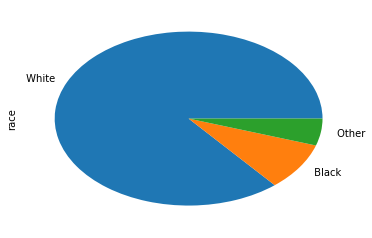

In [355]:
# Agrupando as categorias em race

categories_to_merge = set({'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo'})

for idx in training_data_categorical.index.values:
    race_str = str.strip(training_data_categorical.at[idx,'race'])
    if race_str in categories_to_merge:
        training_data_categorical.at[idx,'race'] = ' Other'

print('White: {0}\nBlack: {1}\nOther: {2}\n'.format(*list(training_data_categorical['race'].value_counts())))
training_data_categorical['race'].value_counts().plot.pie()
plt.show()

##### 2.2.5 Tratando a feature workclass

In [356]:
# Analisando a feature workclass

workclass_frequency = (training_data_categorical['workclass'].value_counts()/training_data_categorical.shape[0])*100
print(workclass_frequency)

 Private             68.673219
 Self-emp-not-inc     7.954545
 Local-gov            6.418919
 ?                    5.866093
 State-gov            4.084767
 Self-emp-inc         3.900491
 Federal-gov          3.071253
 Without-pay          0.030713
Name: workclass, dtype: float64


Como muitas categorias da feature workclass têm baixa representatividade (< 5%), novamente, serão criados novos grupos, que juntam diferentes categorias. Para o caso em questão, 

##### 2.2.6 Tratando a feature marital-status

In [357]:
# Analisando a feature marital-status

marital_status_frequency = (training_data_categorical['marital-status'].value_counts()/training_data_categorical.shape[0])*100
print(marital_status_frequency)

 Married-civ-spouse       46.375921
 Never-married            31.664619
 Divorced                 14.281327
 Separated                 3.347666
 Widowed                   2.979115
 Married-spouse-absent     1.197789
 Married-AF-spouse         0.153563
Name: marital-status, dtype: float64


Quatro categorias da feature marital-status têm baixa representatividade (< 5%). Dessa forma, elas serão incorporadas em outras categorias. Uma possibilidade consiste em dividir marital-status em 3 grandes categorias: Casado atualmente (currently-married), Casado uma vez (once-married) e nunca casado (never-married). Nesse novo agrupamento, o grupo married inclui pessoas casadas legalmente. Nos EUA, separated consiste em um casal que não vive mais junto, porém continua legalmente casado (fonte: http://www.attorneys.com/divorce/legal-separation-versus-divorce). Sendo assim, as 3 grandes categorias seriam:

Currently Married = Married-civ-spouse, Separated, Married-spouse-absent e Married-AF-spouse

Once Married = Divorced, Widowed

Never Married = Never-married

Currently Married    51.074939
Never Married        31.664619
Once Married         17.260442
Name: marital-status, dtype: float64


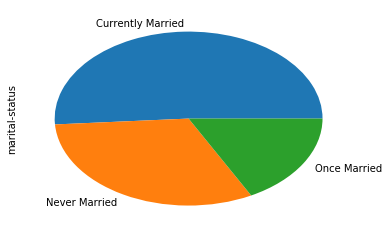

,workclass,marital-status,occupation,relationship,race,earnings
22278,Private,Once Married,Adm-clerical,Unmarried,White,<=50K
8950,Private,Never Married,Prof-specialty,Not-in-family,White,<=50K
7838,Private,Currently Married,Sales,Husband,White,<=50K
16505,Private,Currently Married,Transport-moving,Husband,Other,<=50K
19140,Private,Once Married,Transport-moving,Not-in-family,White,>50K


In [358]:
# Tratando a feature marital-status

for idx in training_data_categorical.index.values:
    marital_str = str.strip(training_data_categorical.at[idx, 'marital-status'])
    if marital_str in {'Married-civ-spouse', 'Separated', 'Married-spouse-absent', 'Married-AF-spouse'}:
        training_data_categorical.at[idx, 'marital-status'] = 'Currently Married'
    elif marital_str in {'Divorced', 'Widowed'}:
        training_data_categorical.at[idx, 'marital-status'] = 'Once Married'
    elif marital_str == 'Never-married':
        training_data_categorical.at[idx, 'marital-status'] = 'Never Married'

print((training_data_categorical['marital-status'].value_counts()/training_data_categorical.shape[0])*100)
training_data_categorical['marital-status'].value_counts().plot.pie()
plt.show()

training_data_categorical.head()

##### 2.2.7 Tratando a feature relationship

In [359]:
# Analisando a feature relationship

relationship_frequency = (training_data_categorical['relationship'].value_counts()/training_data_categorical.shape[0])*100
print(relationship_frequency)

 Husband           40.540541
 Not-in-family     26.750614
 Own-child         14.557740
 Unmarried         10.073710
 Wife               5.251843
 Other-relative     2.825553
Name: relationship, dtype: float64


##### 2.2.8 Tratando a feature occupation

In [360]:
# Analisando a feature occupation

occupation_frequency = (training_data_categorical['occupation'].value_counts()/training_data_categorical.shape[0])*100
print(occupation_frequency)

 Prof-specialty       13.329238
 Exec-managerial      12.561425
 Craft-repair         11.947174
 Sales                11.486486
 Adm-clerical         11.240786
 Other-service        10.073710
 ?                     5.866093
 Machine-op-inspct     5.528256
 Transport-moving      5.036855
 Handlers-cleaners     4.238329
 Tech-support          3.132678
 Farming-fishing       3.040541
 Protective-serv       1.842752
 Priv-house-serv       0.644963
 Armed-Forces          0.030713
Name: occupation, dtype: float64


In [16]:
# Dividindo as variáveis categóricas restantes em dummies

training_data_categorical_ext = pd.get_dummies(training_data_categorical)
training_data_aux = training_data.drop(axis=1, labels=list(training_data_categorical.columns.values))

# Montando o dataset com as variáveis dummies
training_data_with_dummies = pd.concat([training_data_aux, training_data_categorical_ext], axis=1)
training_data_with_dummies.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,earnings_ <=50K,earnings_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
10,37,280464,10,0,0,80,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
20,40,193524,16,0,0,60,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
30,23,190709,12,0,0,52,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
40,31,507875,5,0,0,43,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [202]:
# Calculando a matriz de correlação dos dados

# plt.matshow(training_data_with_dummies.corr())
# plt.show()

# training_data_categorical['native-country'].value_counts()/(training_data_categorical.shape[0])

#### 2.3 Análise das features numéricas

In [14]:
training_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000
mean,38.836967,190768.328216,10.105312,1045.935523,86.695425,40.674854
std,13.643680,105314.876740,2.593632,7199.897154,401.823604,12.520164
min,17.000000,20179.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,117210.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,179666.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,239390.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,857532.000000,16.000000,99999.000000,3683.000000,99.000000


##### 2.3.1 Análise da feature <i>Age</i>

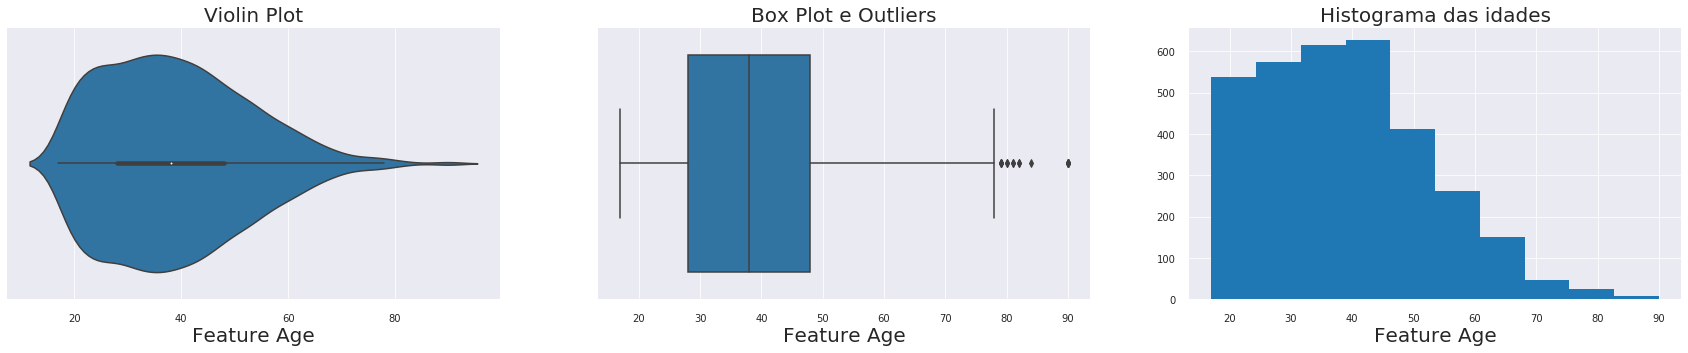

In [15]:
# Visualização da feature Age

# Configuração do estilo e tamanho das imagens
f, ax = plt.subplots(figsize=(30,5))
sns.set_style("darkgrid")

# Violin plot, interessante para saber a concentração dos dados
plt.subplot(131)
sns.violinplot(training_data.age)
plt.xlabel('Feature Age',fontsize=20)
plt.title('Violin Plot',fontsize=20)

# Boxplot, para visualização dos outliers
plt.subplot(132)
sns.boxplot(training_data.age)
plt.xlabel('Feature Age',fontsize=20)
plt.title('Box Plot e Outliers',fontsize=20)

# Histograma dos dados
plt.subplot(133)
plt.hist(training_data.age)
plt.xlabel('Feature Age',fontsize=20)
plt.title('Histograma das idades',fontsize=20)

# Talvez tire em breve esse trecho...
sns.despine(offset=10,trim=True)
plt.show()

##### 2.3.2 Análise das features capital-gain e capital-loss

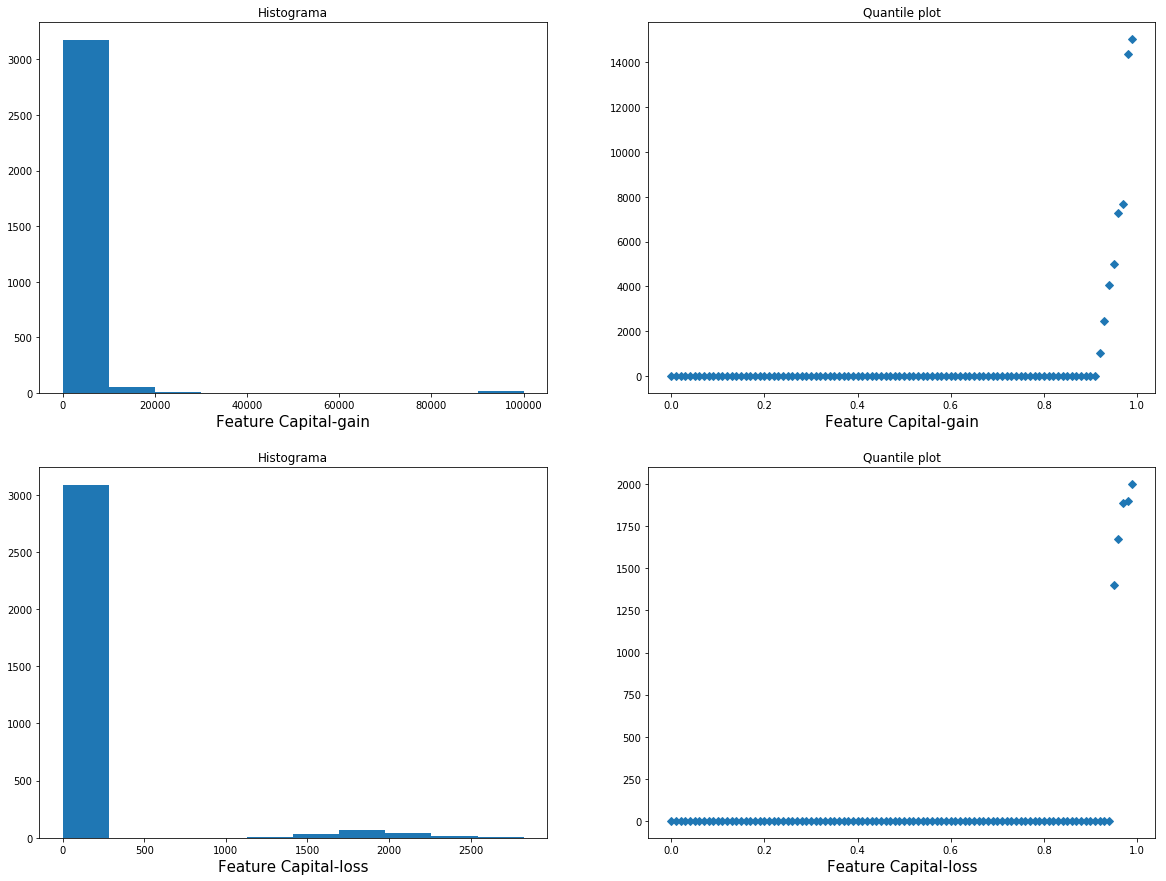

In [401]:
# Feature capital-gain

plt.subplots(figsize=(20,15))

plt.subplot(221)
plt.hist(training_data["capital-gain"])
plt.xlabel('Feature Capital-gain', fontsize=15)
plt.title("Histograma")

# plt.subplot(222)
# sns.boxplot(training_data["capital-gain"])
# plt.xlabel('Feature Capital-gain', fontsize=15)
# plt.title("Box plot")

plt.subplot(222)
mq = stats.mstats.mquantiles(training_data['capital-gain'],np.arange(0,1,0.01))
plt.plot(np.arange(0,1,0.01),mq,'D')
# plt.plot(np.linspace(0,training_data['capital-gain'].values.max(),100), mq, '.')
# stats.probplot(training_data["capital-gain"],plot=plt)
plt.xlabel('Feature Capital-gain', fontsize=15)
plt.title("Quantile plot")

plt.subplot(223)
plt.hist(training_data["capital-loss"])
plt.xlabel('Feature Capital-loss', fontsize=15)
plt.title("Histograma")

# plt.subplot(224)
# sns.boxplot(training_data["capital-loss"])
# plt.xlabel('Feature Capital-loss', fontsize=15)
# plt.title("Box plot")

plt.subplot(224)
mq = stats.mstats.mquantiles(training_data['capital-loss'],np.arange(0,1,0.01))
plt.plot(np.arange(0,1,0.01),mq,'D')
# plt.plot(np.linspace(0,training_data['capital-loss'].values.max(),100), mq, '.')
# stats.probplot(training_data["capital-loss"],plot=plt)
plt.xlabel('Feature Capital-loss', fontsize=15)
plt.title("Quantile plot")

plt.show()

Aqui, vale ressaltar que a maioria dos valores de capital-gain e capital-loss são iguais a 0 (isso pode ser verificado pelos quartis). Os valores diferentes de 0 são outliers. Como tratar esses casos?

##### 2.3.4 Análise da feature fnlwgt

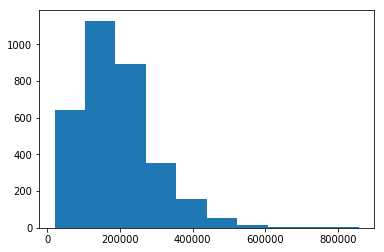

In [275]:
plt.hist(training_data.fnlwgt)
plt.show()

##### 2.3.5 Análise da feature hours-per-week

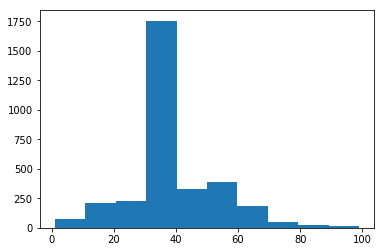

In [10]:
plt.hist(training_data['hours-per-week'])
plt.show()

#### 2.4 Análise de outliers

In [11]:
# De acordo com o gráfico boxplot, existem outliers presentes. Verificando exemplos considerados outliers (acima de 75%)
# Definição dos quantis
Q1, Q3 = training_data.age.quantile(0.25), training_data.age.quantile(0.75)

# Definição de IQR de acordo com a teoria
IQR = Q3 - Q1

outliers = training_data[training_data.age > (Q3 + 1.5 * IQR)]
outliers.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earnings
430,80,?,107762,HS-grad,9,Widowed,?,Not-in-family,White,Male,0,0,24,United-States,<=50K
1040,90,Private,137018,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
4070,90,Private,313986,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
4720,79,Self-emp-not-inc,158319,HS-grad,9,Widowed,Other-service,Not-in-family,White,Female,0,0,24,United-States,<=50K
5370,90,Local-gov,227796,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,60,United-States,>50K


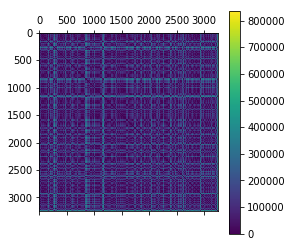

array([120772.0758948 , 119865.48701355,  79528.23980595, ...,
       102418.02571085, 163744.29720055, 126298.49315361])

In [14]:
# Média de distâncias de cada registro

# valores_registros = training_data_with_dummies.values # array, em que cada elemento corresponde a um array de valores, referentes aos valores de um registro do dataset
# aux = np.empty([valores_registros.shape[0]])

# media_distancias = np.empty([valores_registros.shape[0]])
# matriz_distancias = np.empty(shape=(valores_registros.shape[0], valores_registros.shape[0]))
# idx_media_distancias = 0

# for idx1 in range(valores_registros.shape[0]):
#     for idx2 in range(valores_registros.shape[0]):
#         aux[idx2] = np.sqrt(((valores_registros[idx1]-valores_registros[idx2])**2).sum())  # distância euclidiana do registro a[idx1] para o registro a[idx2]
#         matriz_distancias[idx2,idx1] = aux[idx2]
#     media_distancias[idx_media_distancias] = aux.mean()
#     idx_media_distancias += 1
    
# plt.matshow(matriz_distancias)
# plt.colorbar()
# plt.show()    
    
# plt.plot(np.sort(media_distancias),'x')
# plt.show()

# Cálculo da matriz de dissimilaridades entre registros


        

In [20]:
# Um pouco mais sobre os outliers:
outliers.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,18.000000,18.000000,18.000000,18.000000,18.0,18.000000
mean,84.222222,152811.000000,9.666667,1192.222222,0.0,38.000000
std,4.905646,79711.492969,3.360672,4718.192532,0.0,16.545837
min,79.000000,42435.000000,4.000000,0.000000,0.0,7.000000
25%,80.000000,99508.000000,7.500000,0.000000,0.0,26.750000
50%,82.000000,139594.500000,9.000000,0.000000,0.0,40.000000
75%,90.000000,205349.750000,13.000000,0.000000,0.0,47.500000
max,90.000000,313986.000000,14.000000,20051.000000,0.0,66.000000


In [21]:
# Quantos outliers?
print('Quantidade de outliers: {}\nPorcentagem de outliers em relação aos dados:{:.4f}%'.format(outliers.shape[0],(outliers.shape[0]/training_data.shape[0])*100))

Quantidade de outliers: 18
Porcentagem de outliers em relação aos dados:0.5527%


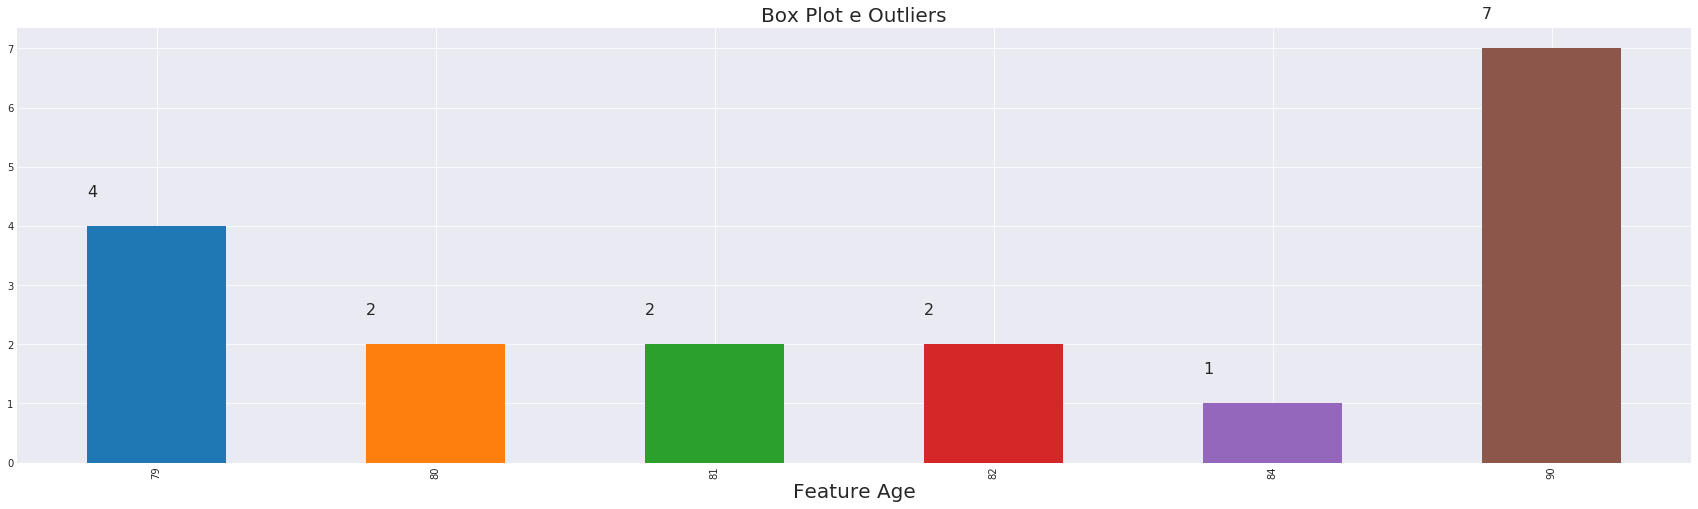

In [22]:
# Histograma dos outliers
plt.figure(figsize=(30,8))
sns.set_style("darkgrid")

# BoxPlot
ax = outliers.age.value_counts().sort_index().plot.bar()
plt.xlabel('Feature Age',fontsize=20)
plt.title('Box Plot e Outliers',fontsize=20)

for patch in ax.patches:
    ax.text(patch.get_x(), patch.get_height() + 0.5, str(patch.get_height()),fontsize=16)
    
plt.show()

##### Qual a relação entre age e earnings?

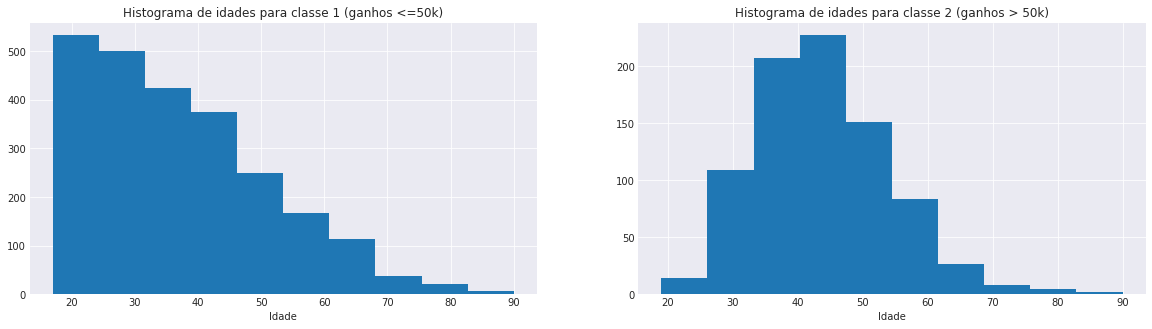

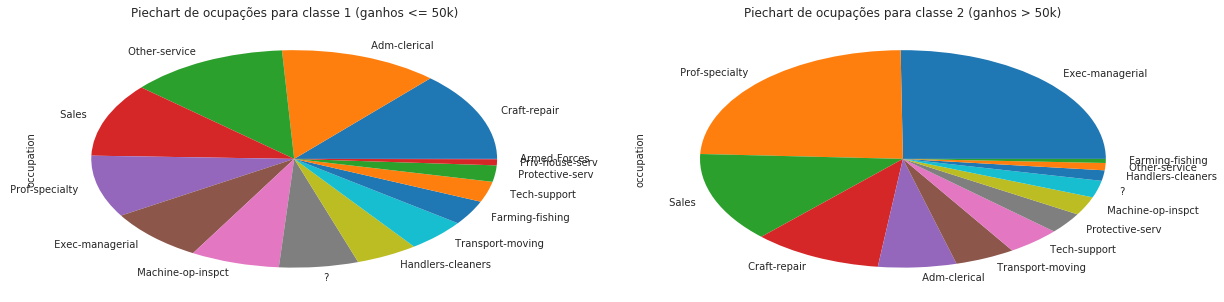

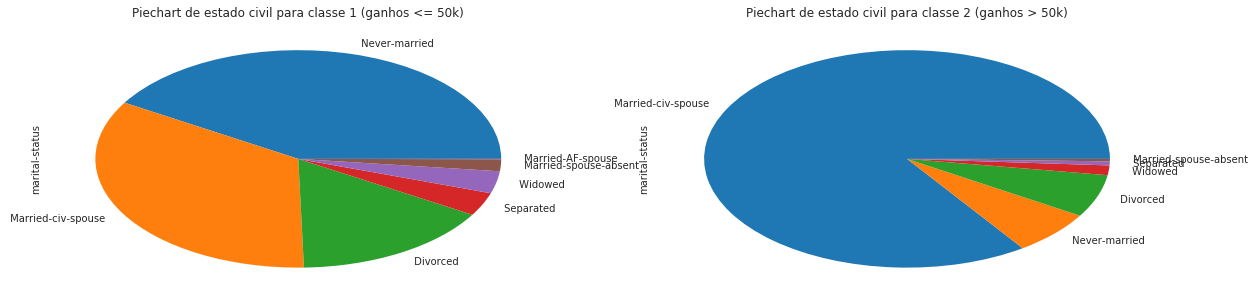

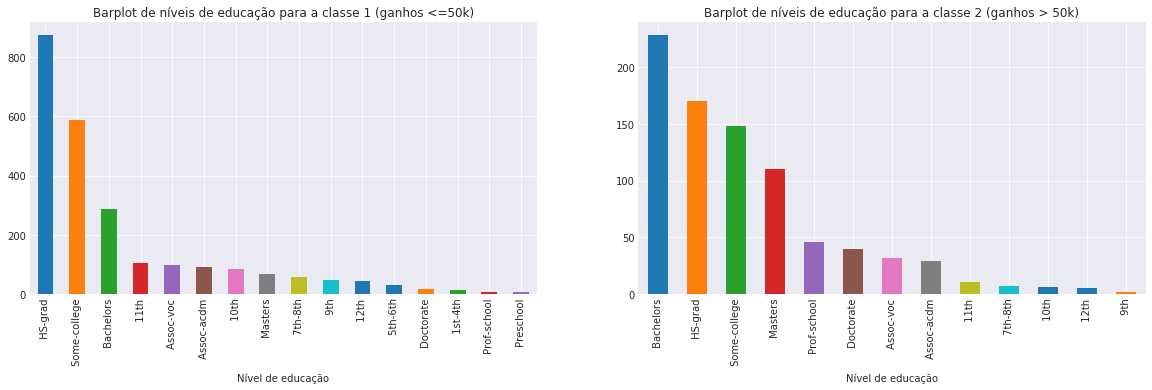

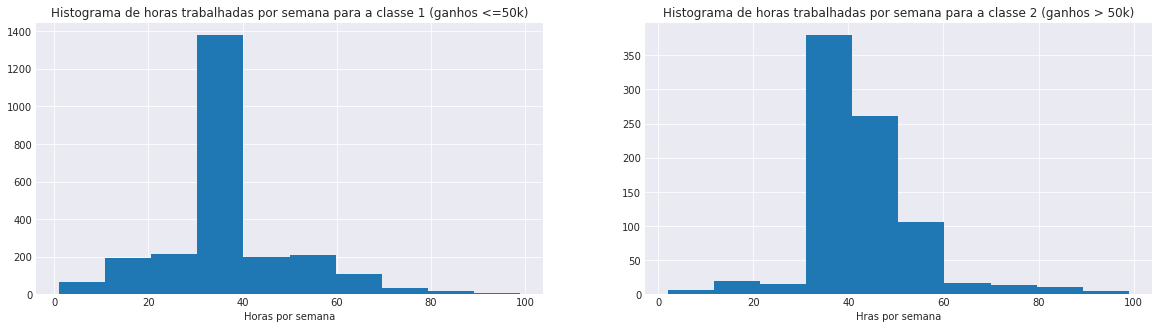

In [23]:
# Histogramas de idade e ganhos

# Convertendo as labels "<=50k" e ">50k" para -1 e 1, respectivamente
labels, idx = pd.factorize(training_data.earnings)
labels[labels==0] = -1
labels[labels==1] = 1

# Nova coluna que representa as classes em -1 e 1

training_data_discretized_earnings = training_data
training_data_discretized_earnings['earnings-num'] = labels

training_data_class1 = training_data.loc[training_data_discretized_earnings['earnings-num']==-1]
training_data_class2 = training_data.loc[training_data_discretized_earnings['earnings-num']==1]

plt.figure(figsize=(20,5))

plt.subplot(121)
plt.hist(training_data_class1.age)
plt.xlabel('Idade')
plt.title('Histograma de idades para classe 1 (ganhos <=50k)')

plt.subplot(122)
plt.hist(training_data_class2.age)
plt.xlabel('Idade')
plt.title('Histograma de idades para classe 2 (ganhos > 50k)')

plt.show()

# Piechart para ocupações profissionais e ganhos

plt.figure(figsize=(20,5))

plt.subplot(121)
training_data_class1.occupation.value_counts().plot.pie()
plt.title('Piechart de ocupações para classe 1 (ganhos <= 50k)')

plt.subplot(122)
training_data_class2.occupation.value_counts().plot.pie()
plt.title('Piechart de ocupações para classe 2 (ganhos > 50k)')

plt.show()

# Piechart para estado civil e ganhos

plt.figure(figsize=(20,5))

plt.subplot(121)
training_data_class1['marital-status'].value_counts().plot.pie()
plt.title('Piechart de estado civil para classe 1 (ganhos <= 50k)')

plt.subplot(122)
training_data_class2['marital-status'].value_counts().plot.pie()
plt.title('Piechart de estado civil para classe 2 (ganhos > 50k)')

plt.show()

# Barplot para níveis de educação e ganhos

plt.figure(figsize=(20,5))

plt.subplot(121)
training_data_class1.education.value_counts().plot.bar()
plt.xlabel('Nível de educação')
plt.title('Barplot de níveis de educação para a classe 1 (ganhos <=50k)')

plt.subplot(122)
training_data_class2.education.value_counts().plot.bar()
plt.xlabel('Nível de educação')
plt.title('Barplot de níveis de educação para a classe 2 (ganhos > 50k)')

plt.show()

# Histogrma para horas-por-semana e ganhos

plt.figure(figsize=(20,5))

plt.subplot(121)
plt.hist(training_data_class1['hours-per-week'])
plt.xlabel('Horas por semana')
plt.title('Histograma de horas trabalhadas por semana para a classe 1 (ganhos <=50k)')

plt.subplot(122)
plt.hist(training_data_class2['hours-per-week'])
plt.xlabel('Hras por semana')
plt.title('Histograma de horas trabalhadas por semana para a classe 2 (ganhos > 50k)')

plt.show()


## 3. Pré-processamento dos dados

#### Transformação dos targets em -1 e +1

In [17]:
# Transformação do target: utilização de -1 para ganhos menores que 50K/Year, +1 para ganhos maiores de 50K/year
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()

#### Separação do dataset

In [18]:
# Separação do dataset em treino e teste
from sklearn.model_selection import train_test_split

## 4. Treinamento dos modelos

### 4.1 Árvores binárias de decisão

### 4.2 Random Forests

### 4.3 Redes Neurais

### 4.4 Naive Bayes

### 4.5 SVM

## 5. Resultados

Anotações:

- Verificar a relação entre outliers(idade) e desfecho (<50K). Parece que idosos ganham menos que 50K
- 


## 6. Referências Bibliográficas

[1] (Online) UCI Machine Learning Repository: Census Income Dataset. Disponível em https://archive.ics.uci.edu/ml/datasets/Census+Income. Último acesso: 21/03/2018 às 00:22 horas.

[2] (Online) UCI Machine Learning Repository: Census Income KDD. Disponível em https://archive.ics.uci.edu/ml/datasets/Census-Income+(KDD). Último acesso: 21/03/2018 às 01:30 horas.

[3] (Online) Classifying Income data from Census 1994 Data. Disponível em https://cseweb.ucsd.edu/~jmcauley/cse190/reports/sp15/024.pdf. Último acesso: 21/03/2018 às 01:32 horas.

[4] Ristanoski, Goce & Liu, Wei & Bailey, James. (2013). Discrimination aware classification for imbalanced datasets. International Conference on Information and Knowledge Management, Proceedings. 1529-1532. 10.1145/2505515.2507836.

[5] Jiawei Han. 2005. Data Mining: Concepts and Techniques. Morgan Kaufmann Publishers Inc., San Francisco, CA, USA.

[6]
